<a href="https://colab.research.google.com/github/krahul2024/machine-learning/blob/main/Tutorials/Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Linear Regression

**Single Linear Regression :**
*It is supervised learning algorithm, here we have one input column and one output column, just like `y = mx + c`*
In this case we have one feature and one target/output, we have to derive an equation based on given examples of feature(only one) and relate it with the target.
The result of single linear regresion is a straight line equation.
```
 y = wx + b, b being the intercept/bias.
```
First thing is we can do with any data is to plot it, we can observe from any data is linearity/non-linearity. In any case(whether the data is linear/non-linear), we can always draw a straight line which is closest to most of the data points, as we are performing single linear regression.


To get started with single linear regression problem, we can get some random points and then try to predict result for some other points, which we didn't consider during analysis/training.



In [13]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
print('Done.')

Done.


In [12]:
# generate dataset for our single linear regression
feature = np.linspace(-430, 432, 100)
target = np.linspace(-53, 67, 100)

feature[:10], target[:10]

(array([-430.        , -421.29292929, -412.58585859, -403.87878788,
        -395.17171717, -386.46464646, -377.75757576, -369.05050505,
        -360.34343434, -351.63636364]),
 array([-53.        , -51.78787879, -50.57575758, -49.36363636,
        -48.15151515, -46.93939394, -45.72727273, -44.51515152,
        -43.3030303 , -42.09090909]))

In [22]:
# generate a pandas dataframe

data = pd.DataFrame(
    data = {
        'Feature' : [np.round(x, 2) for x in feature],
        'Target': [np.round(x, 2) for x in target]
      }
  )

data.head()

,Feature,Target
0,-430.00,-53.00
1,-421.29,-51.79
2,-412.59,-50.58
3,-403.88,-49.36
4,-395.17,-48.15


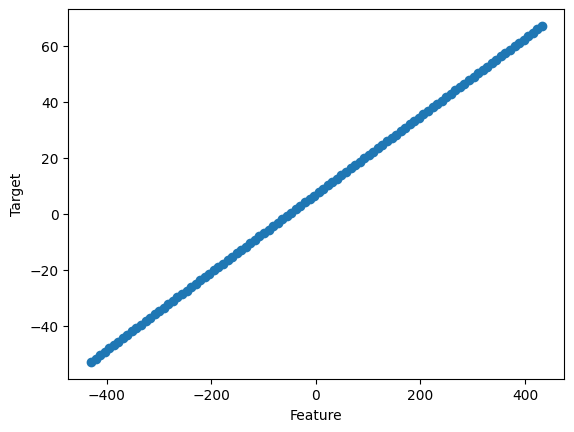

In [25]:
# plot the points
plt.scatter(data['Feature'], data['Target'])
plt.xlabel('Feature')
plt.ylabel('Target')

plt.show()

*In this case we can see the generated data fits in a perfect straight line but it is usually not the case in real datasets*


In [45]:
x = data['Feature'].values.reshape(-1, 1) # doing this reshape because the built-in regression model expects 2d array
y = data['Target'].values.reshape(-1, 1)

# Divide the dataset into training and testing datasets
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(
    x, y, test_size = 0.2
)

train_x.shape, train_y.shape

((80, 1), (80, 1))

In [46]:
# Using built-in Linear Regression method from sklearn
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

# training the model
lr_model.fit(train_x, train_y)
print('Training Completed.')

Training Completed.


Prediction for each of the `test_x` array values, and then comparing them with the `test_y`(the actual output), we will use mean absolute error for this comparison.

In [54]:
lr_result = lr_model.predict(test_x)
result = pd.DataFrame(
    data = {
        'Actual Value' : [x[0] for x in test_y],
        'Predicted_value' : [x[0] for x in lr_result],
        'Error' : [abs(np.round(x[0] - y[0], 5)) for x, y in zip(test_y, lr_result)]
        }
    )

result.head(10)

,Actual Value,Predicted_value,Error
0,-22.70,-22.696461,0.00354
1,19.73,19.726662,0.00334
2,42.76,42.757710,0.00229
3,-21.48,-21.485327,0.00533
4,-44.52,-44.514983,0.00502
5,-34.82,-34.817553,0.00245
6,22.15,22.151716,0.00172
7,36.70,36.696469,0.00353
8,-0.88,-0.879332,0.00067
9,-37.24,-37.242606,0.00261


we can see we are getting some error, which is negligible, but we also know that this data was already in a perfect straight line shape, so this doesn't help much. Working on a real dataset would give us some insights about the errors with this approach.